🔍 Exemplo de dados:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 RELATÓRIO FINAL
Acurácia final no teste: 1.00
Perda final no teste: 0.0577
Situação do modelo: Ótimo


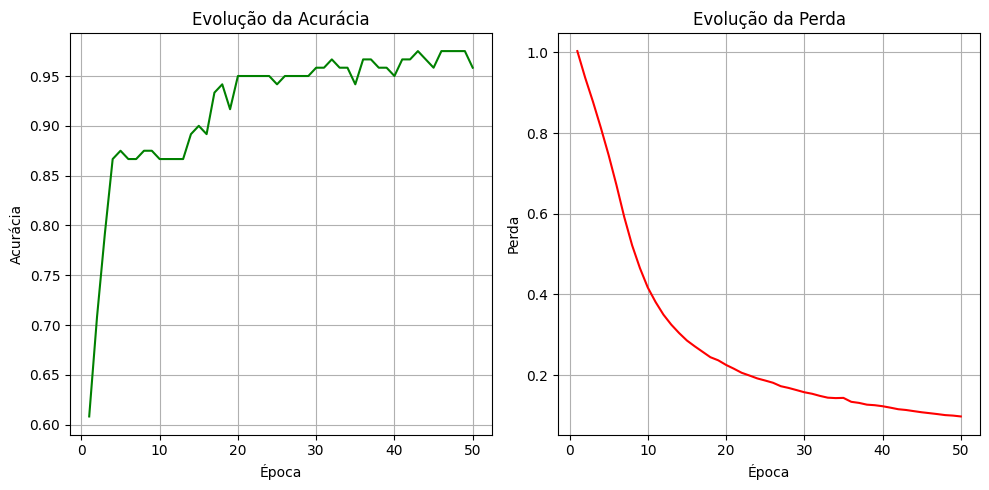

In [1]:
## Manipulação de Dados c/ ML

import tensorflow as tf
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Carregando o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names

# 2. Criando DataFrame com as informações
df = pd.DataFrame(X, columns=features)
df['target'] = y
df['species'] = df['target'].apply(lambda i: target_names[i])

print("🔍 Exemplo de dados:")
print(df.head())

# 3. Separar dados de entrada e saída
X = df[features].values
y = df['target'].values

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# 5. Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Construir o modelo com TensorFlow
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

# 7. Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 8. Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)

# 9. Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# 10. Histórico do treino em DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history_df.index + 1

# 11. Avaliação da situação
def avaliar_modelo(acc):
    if acc >= 0.9:
        return "Ótimo"
    elif acc >= 0.75:
        return "Bom"
    else:
        return "Ruim"

situacao = avaliar_modelo(accuracy)

# 12. Relatório final
print("\n RELATÓRIO FINAL")
print(f"Acurácia final no teste: {accuracy:.2f}")
print(f"Perda final no teste: {loss:.4f}")
print(f"Situação do modelo: {situacao}")

# 13. Gráficos de treino
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history_df['epoch'], history_df['accuracy'], label='Acurácia', color='green')
plt.title("Evolução da Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history_df['epoch'], history_df['loss'], label='Perda', color='red')
plt.title("Evolução da Perda")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.grid()

plt.tight_layout()
plt.show()